<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21619" size=6px>                   
                    <b> Cancer Diagnosis
                    </b>
                </font>
            </div>
            

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Import libraries
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [191]:
# Import numpy for mathematical operations
import numpy as np

# Import pandas for manipulating and retrieving dataset
import pandas as pd

# Import matplotlib for visualization tools
import matplotlib.pyplot as plt

# Import seaborn for advanced visualization tools
import seaborn as sns

# Import stats module to perform statistical operations
from scipy import stats

# Import Power Transformer for transformation
from sklearn.preprocessing import PowerTransformer

# Import Label encoder for encoding categories
from sklearn.preprocessing import LabelEncoder

# Import train test split to split the dataset for training and testing
from sklearn.model_selection import train_test_split

# Import Standard Scaler for scaling numerical features
from sklearn.preprocessing import StandardScaler

# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Import KNN model
from sklearn.neighbors import KNeighborsClassifier

# Import Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Import Decision Tree classifier model
from sklearn.tree import DecisionTreeClassifier

# Import Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

# Import Ada Boost Classifier model
from sklearn.ensemble import AdaBoostClassifier

# Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

# Import Xtreme Gradient Boost Classifier model
from xgboost import XGBClassifier

# Import statsmodels for OLS model
import statsmodels.api as sm

# Import metrics for evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score,roc_auc_score,roc_curve

# Import Recursieve Feature Selector for feature selection
from sklearn.feature_selection import RFECV

# Import GridSearchCv for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
np.warnings = warnings

In [192]:
# Import data from csv file into dataframe
data=pd.read_csv('Diagnosis.csv')
df=data.copy()

In [193]:
# Display top 5 observations of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


<a id="understanding"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Data Understanding  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [194]:
# Display number of rows and columns
print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

Number of rows:  569
Number of columns:  32


In [195]:
# Display basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [196]:
# Descriptive statistics of numerical columns
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [197]:
#Drop ID column because it contributes no information
df.drop('id', axis =1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [198]:
# Checking for Null values
df.isnull().sum().sum()

0

In [199]:
# Checking for Duplicate rows
df.duplicated().sum()


0

<a id="eda"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Exploratory Data Analysis
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

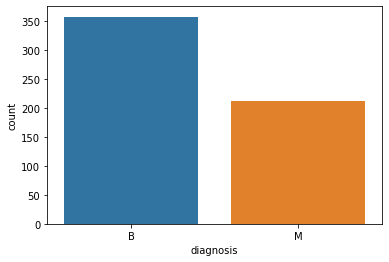

Number of Benign:  357
Number of Malignant :  212


In [200]:
# Count plot to visualize the target variable
sns.countplot(df['diagnosis'])
plt.show()
B, M =df['diagnosis'].value_counts() # Using -`value_counts` from the Pandas to store the individual count.
print('Number of Benign: ', B)
print('Number of Malignant : ', M)

* Benign indicates Non-cancerous cells
* Malignant indicates Cancerous cells

<a id="numerical"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Box Plots for numerical data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [201]:
# Split dataset into numerical and categorical
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(include=object)

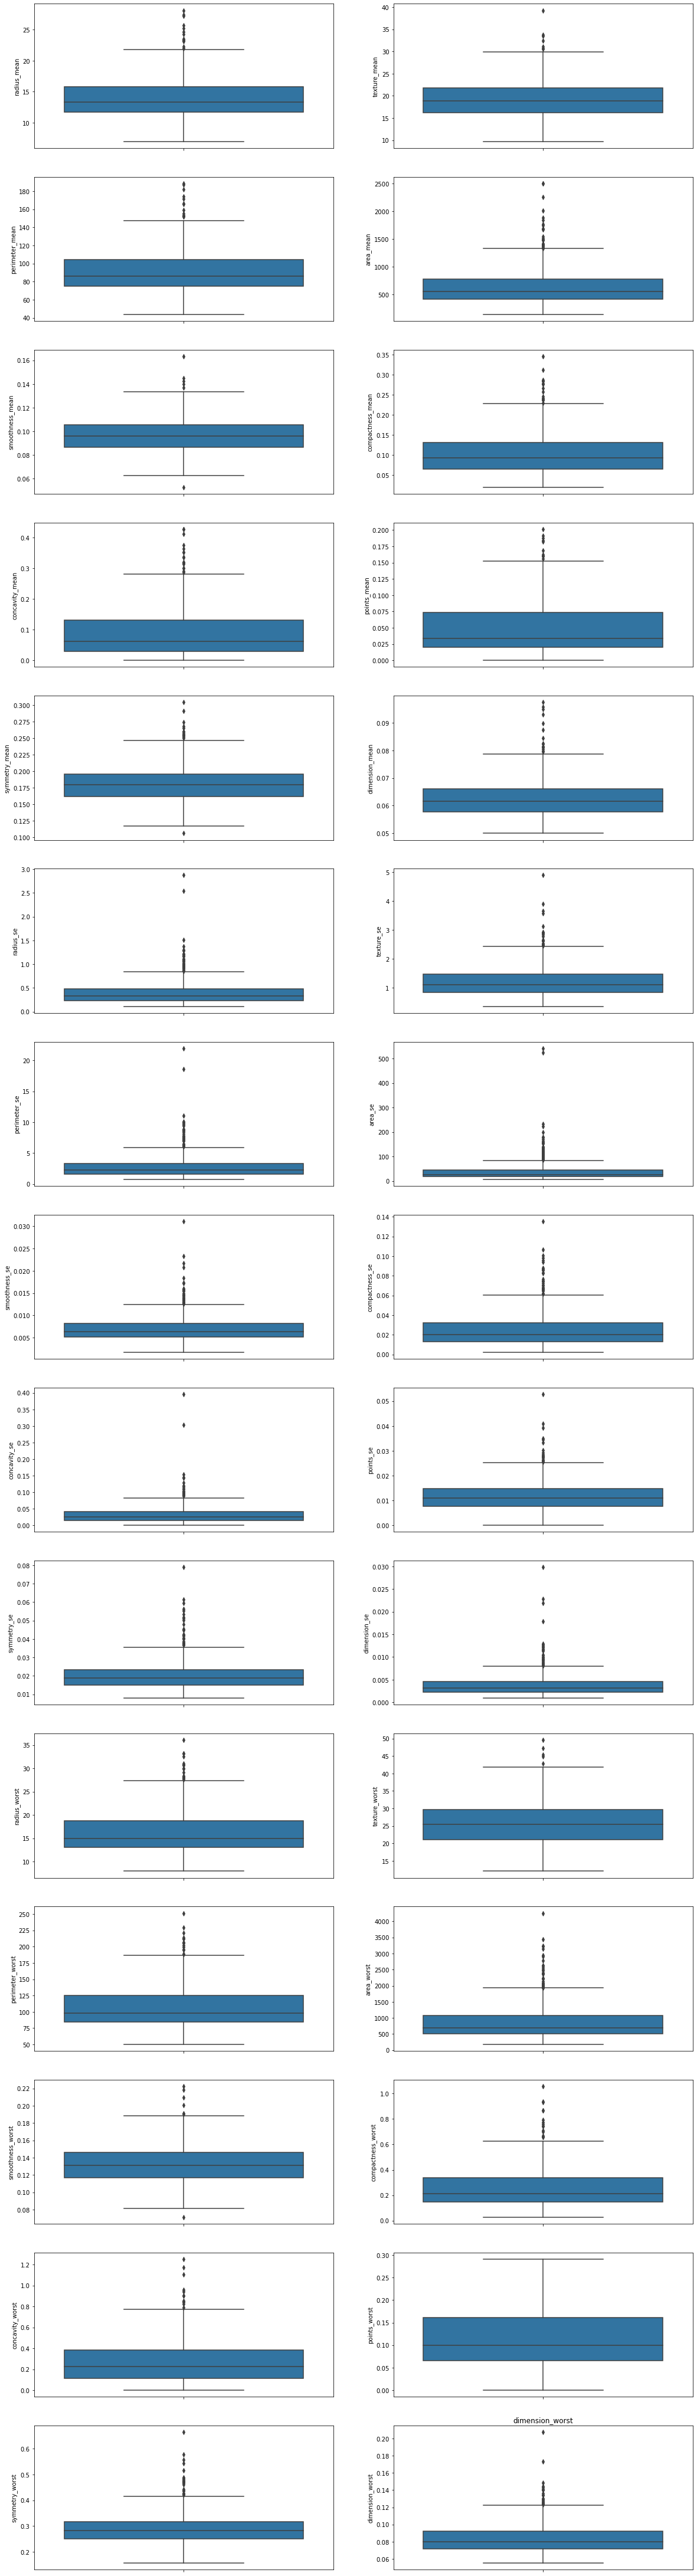

In [202]:
fig,subplots = plt.subplots(15,2,figsize=(20,80))
for col,axis in zip(df_num.columns,subplots.flatten()):
    plt.title(col)
    sns.boxplot(y=df_num[col],ax=axis)
plt.show()

* Almost all the attributes has outliers

<a id="numvstarget"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Distribution of numerical columns with respect to target column
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

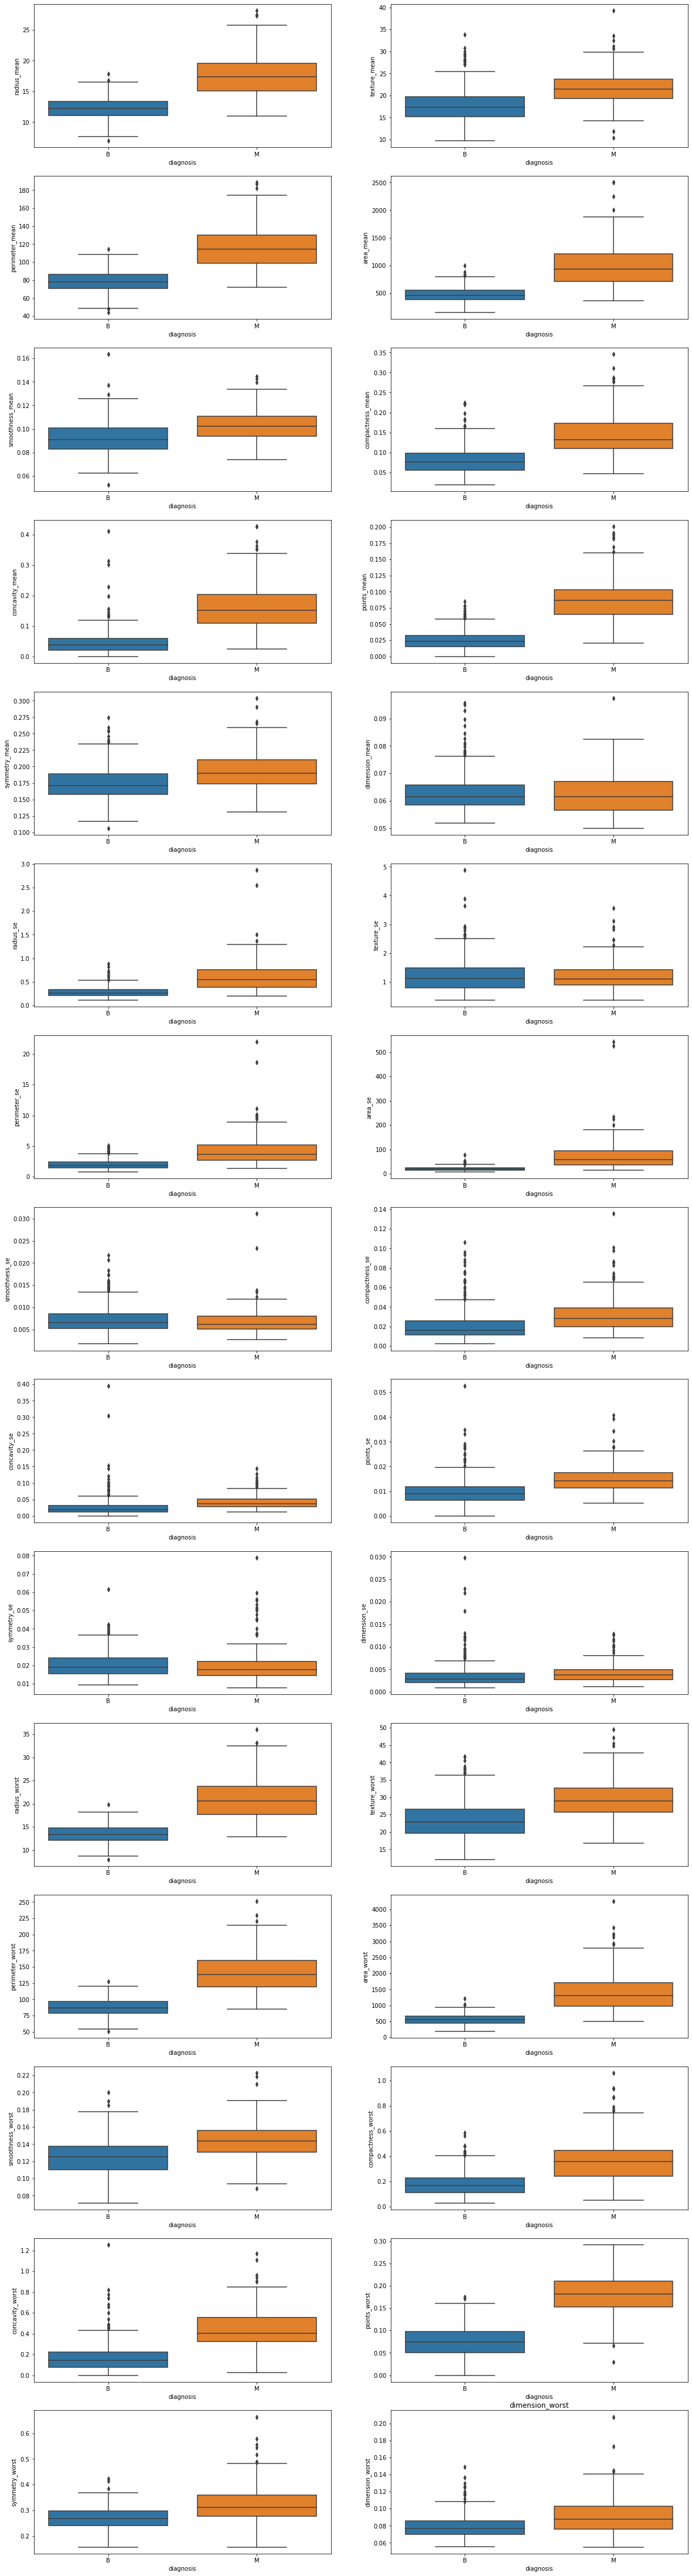

In [203]:
fig,subplots = plt.subplots(15,2,figsize=(20,80))
for col,axis in zip(df_num.columns,subplots.flatten()):
    plt.title(col)
    sns.boxplot(y=df_num[col],x=df["diagnosis"],ax=axis)
plt.show()

<a id="correlation"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Heat map of correlation
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

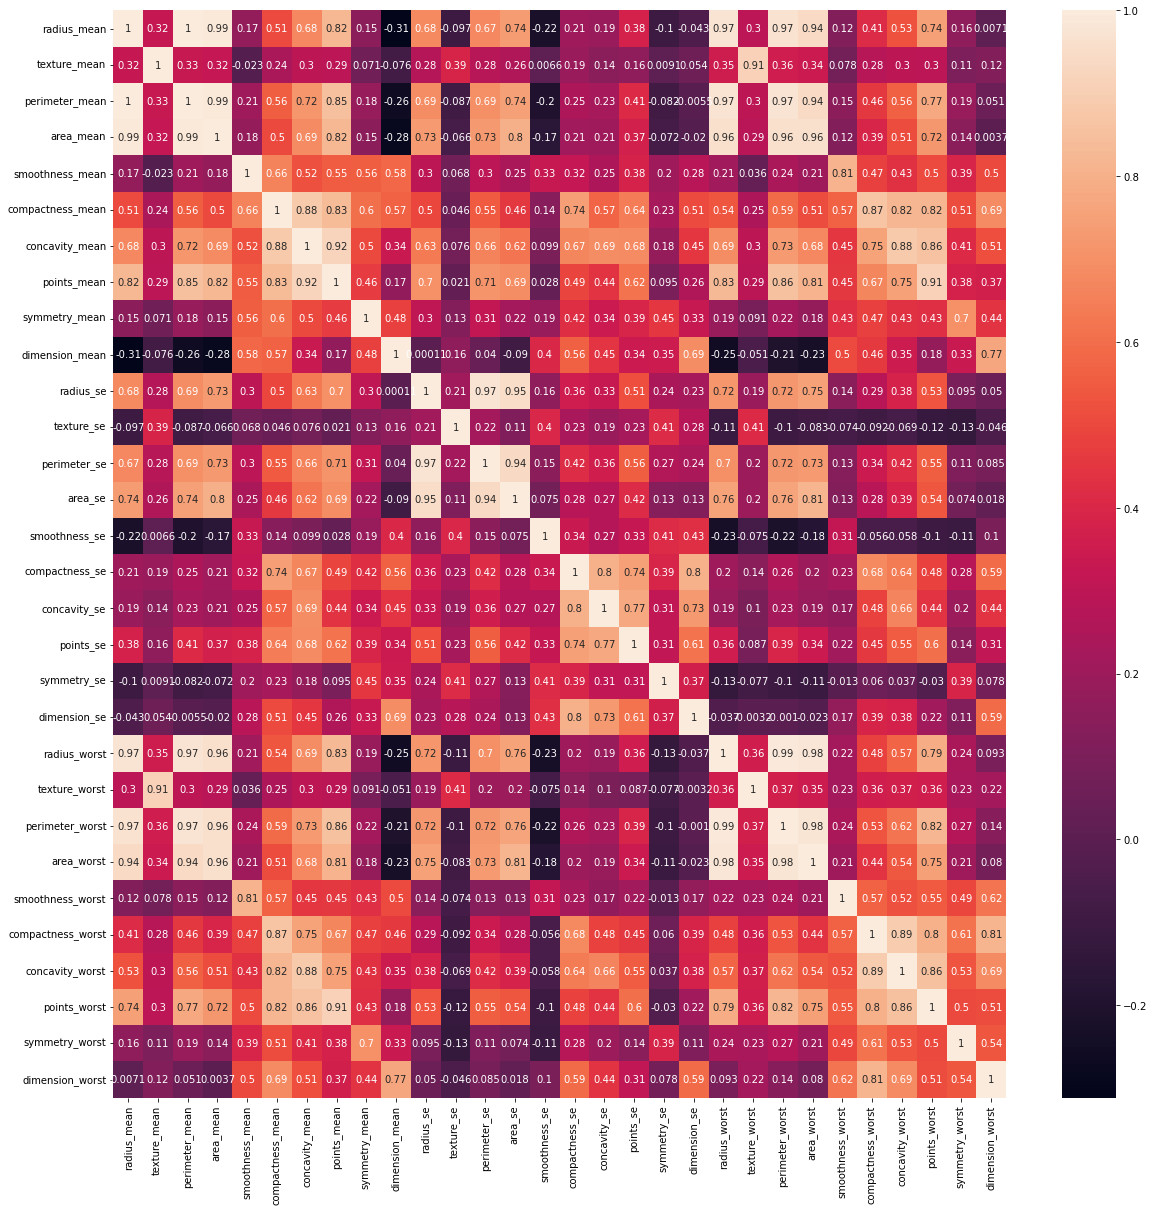

In [204]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

* From the above plot most of the varibles show multicollinearity

In [168]:
outlier_values = []
for i in df_num.columns:
    Q1 = np.quantile(df_num[i],0.25)
    Q3 = np.quantile(df_num[i],0.75)
    IQR = Q3-Q1
    ul = Q3+(IQR*1.5)
    ll = Q1-(IQR*1.5)
    outlier = df_num[(df_num[i]<ll) | (df_num[i]>ul)]
    outlier_values.append(outlier[i].values)

In [169]:
outliers = pd.DataFrame({"Outliers":outlier_values},index=[df_num.columns])
outliers

,Outliers
radius_mean,"[25.73, 23.29, 24.25, 25.22, 23.09, 27.22, 23...."
texture_mean,"[30.72, 30.62, 39.28, 31.12, 32.47, 33.56, 33.81]"
perimeter_mean,"[174.2, 158.9, 166.2, 171.5, 152.1, 182.1, 152..."
area_mean,"[2010.0, 1685.0, 1761.0, 1404.0, 1878.0, 1546...."
smoothness_mean,"[0.1425, 0.1447, 0.1398, 0.1634, 0.05263, 0.1371]"
compactness_mean,"[0.2839, 0.2363, 0.2867, 0.2413, 0.2665, 0.229..."
concavity_mean,"[0.3368, 0.3523, 0.4268, 0.3339, 0.3001, 0.287..."
points_mean,"[0.1913, 0.162, 0.2012, 0.1845, 0.1878, 0.1595..."
symmetry_mean,"[0.2597, 0.2655, 0.2521, 0.2538, 0.2595, 0.274..."
dimension_mean,"[0.09744, 0.08743, 0.08261, 0.07976, 0.09575, ..."


In [87]:
#Removing outliers
for i in df_num.columns:
    Q1 = np.quantile(df_num[i],0.25)
    Q3 = np.quantile(df_num[i],0.75)
    IQR = Q3-Q1
    ul = Q3+(IQR*1.5)
    ll = Q1-(IQR*1.5)
    for j in df_num.index:
        if df_num.loc[j,i]<ll:
            df_num.loc[j,i]=ll
        elif df_num.loc[j,i]>ul:
            df_num.loc[j,i] = ul

In [88]:
#Remove features with high multicollinearity
# Assuming df is your DataFrame containing the features
# Compute the correlation matrix
corr_matrix = df_num.corr().abs()

# Create a mask to identify highly correlated features
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set the threshold for correlation
threshold = 0.8

# Find pairs of features with correlation above the threshold
highly_correlated = np.where(mask & (corr_matrix > threshold))

# Remove one feature from each highly correlated pair
features_to_drop = set()
for i, j in zip(*highly_correlated):
    if i != j:
        feature_i = corr_matrix.columns[i]
        feature_j = corr_matrix.columns[j]
        if feature_i not in features_to_drop:
            features_to_drop.add(feature_j)

# Remove the chosen features from the dataset
df_filtered = df_num.drop(columns=features_to_drop)

# Print the features removed
print("Features removed due to high multicollinearity:", features_to_drop)


Features removed due to high multicollinearity: {'points_worst', 'smoothness_worst', 'concavity_mean', 'perimeter_mean', 'area_worst', 'perimeter_se', 'concavity_worst', 'radius_worst', 'points_mean', 'perimeter_worst', 'area_mean', 'dimension_se', 'area_se', 'compactness_worst', 'concavity_se', 'texture_worst'}


In [152]:
df.skew()

radius_mean          0.942380
texture_mean         0.650450
perimeter_mean       0.990650
area_mean            1.645732
smoothness_mean      0.456324
compactness_mean     1.190123
concavity_mean       1.401180
points_mean          1.171180
symmetry_mean        0.725609
dimension_mean       1.304489
radius_se            3.088612
texture_se           1.646444
perimeter_se         3.443615
area_se              5.447186
smoothness_se        2.314450
compactness_se       1.902221
concavity_se         5.110463
points_se            1.444678
symmetry_se          2.195133
dimension_se         3.923969
radius_worst         1.103115
texture_worst        0.498321
perimeter_worst      1.128164
area_worst           1.859373
smoothness_worst     0.415426
compactness_worst    1.473555
concavity_worst      1.150237
points_worst         0.492616
symmetry_worst       1.433928
dimension_worst      1.662579
dtype: float64

* Most of the columns show skewness

<a id="scaling"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>Transformation
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [205]:
# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the data
transformed_data = pt.fit_transform(df_num)

# Convert the transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=df_num.columns)

<a id="scaling"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Scaling
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [206]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical data and transform it
scaled_data = scaler.fit_transform(df_num)

# Convert the scaled data array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_num.columns)


In [207]:
# Replacing Benign with '0' and Malignant with '1'
df_cat['diagnosis'] = df_cat['diagnosis'].map({'B': 0, 'M': 1}) 

In [208]:
df = pd.concat([scaled_df,df_cat], axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,diagnosis
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,...,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721,0
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,...,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528,0
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,...,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606,0
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,...,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517,0
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,...,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492,0


<a id="split"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Train-Test Split
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [209]:
X = df.drop('diagnosis', axis=1)  # dropping the target column
y = df['diagnosis']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [210]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


<a id="testvstrain"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Check if train set and test set are representation of overall dataset
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

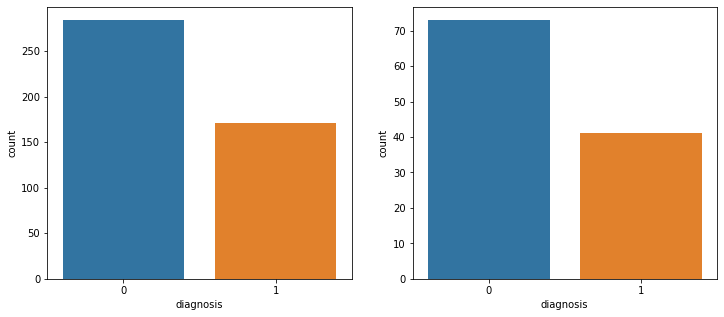

In [211]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(y_train)
plt.subplot(122)
sns.countplot(y_test)
plt.show()

* Since the distribution of train dataset and test dataset are similar, we can conclude that both train and test representative of the overall data.

<a id="model"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Model Building
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# Training model using various classification Algorithns

In [212]:
lr = LogisticRegression().fit(X_train,y_train)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
nb = GaussianNB().fit(X_train,y_train)
dt = DecisionTreeClassifier().fit(X_train,y_train)
rf = RandomForestClassifier().fit(X_train,y_train)
ab = AdaBoostClassifier().fit(X_train,y_train)
gb = GradientBoostingClassifier().fit(X_train,y_train)
xgb = XGBClassifier().fit(X_train,y_train)

<a id="comparison"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Models Comparison
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [213]:
train_scores = []
test_scores = []
models = [lr,knn,nb,dt,rf,ab,gb,xgb]
for model in models:
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    test_scores.append(accuracy_score(y_test,y_pred_test))
    train_scores.append(accuracy_score(y_train,y_pred_train))

### Model Performance without dropping multicollinear features and outliers

In [214]:
model_performance = pd.DataFrame(index=["Logistic Regression","K-Nearest Neighbors","Naive Bayes","Decision Tree",
                                        "Random Forest","Ada Boost","Gradient Boost","XGBoost"],
                                 data={"Train accuracy":train_scores,"Test accuracy":test_scores})
model_performance

,Train accuracy,Test accuracy
Logistic Regression,0.986813,0.982456
K-Nearest Neighbors,0.982418,0.964912
Naive Bayes,0.936264,0.947368
Decision Tree,1.000000,0.885965
Random Forest,1.000000,0.938596
Ada Boost,1.000000,0.991228
Gradient Boost,1.000000,0.947368
XGBoost,1.000000,0.964912


### Model Performance after dropping multicollinear features and outliers

In [100]:
model_performance = pd.DataFrame(index=["Logistic Regression","K-Nearest Neighbors","Naive Bayes","Decision Tree",
                                        "Random Forest","Ada Boost","Gradient Boost","XGBoost"],
                                 data={"Train accuracy":train_scores,"Test accuracy":test_scores})
model_performance

,Train accuracy,Test accuracy
Logistic Regression,0.969231,0.947368
K-Nearest Neighbors,0.967033,0.947368
Naive Bayes,0.896703,0.912281
Decision Tree,1.000000,0.912281
Random Forest,1.000000,0.903509
Ada Boost,1.000000,0.938596
Gradient Boost,1.000000,0.921053
XGBoost,1.000000,0.921053


In [215]:
ab_model = AdaBoostClassifier().fit(X_train,y_train)
y_pred = ab_model.predict(X_test)

In [216]:
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Accuracy score:  0.9912280701754386


In [217]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        73
           1       0.98      1.00      0.99        41

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



* Comparing to other models AdaBoost classifier performs well.

### VARIABLE IMPORTANCE PLOT

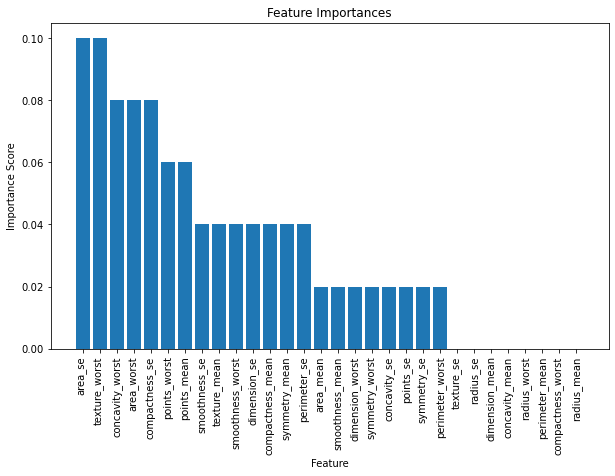

In [190]:
importances = ab.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

* The above plot shows the importance of the variable from top to least.

### ANN Model

In [223]:
from keras.models import Sequential
from keras.layers import Dense

In [225]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0138
Train score: 0.026510749012231827
Train accuracy: 0.9912087917327881
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
********************
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9867 - loss: 0.0249 
Test score: 0.03497005254030228
Test accuracy: 0.9824561476707458


Text(0.5, 15.0, 'Predicted label')

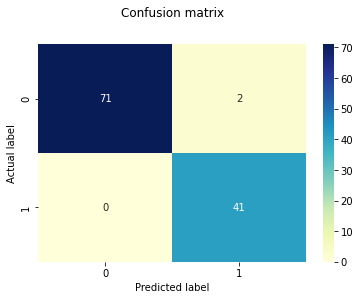

In [226]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [227]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        73
           1       0.95      1.00      0.98        41

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



<a id="conclusion"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  CONCLUSION  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Based on the analysis conducted, it is evident that both the Adaptive Boosting (AdaBoost) classifier and the Artificial Neural Network (ANN) model consistently demonstrated strong performance during both training and testing phases. Additionally, the importance of having a deep understanding of the attributes within the dataset became apparent, as the model's performance notably declined when attributes with multicollinearity and outliers were removed.

Given that the dataset pertains to tumor data, it underscores the importance of handling attributes and outliers with care, as these factors can significantly impact the predictive accuracy of the models. Therefore, a thorough understanding of the data characteristics and domain knowledge is crucial for effective analysis and modeling.

Moving forward, additional steps can be taken to enhance the predictive capabilities of the models. These steps may include:
1. Conducting further detailed studies on the model parameters, possibly through statistical testing, to identify the most influential features and refine the model accordingly.
2. Implementing parameter tuning techniques to optimize the model's performance and generalization ability.
3. Exploring advanced techniques such as Principal Component Analysis (PCA) to reduce dimensionality and extract essential information from the dataset.
4. Focusing on other performance metrics beyond accuracy, such as recall, precision, and F1 score, to gain a more comprehensive understanding of the model's performance across different aspects.

In conclusion, a holistic approach that combines domain knowledge with rigorous modeling techniques will be essential for achieving better predictions and insights from the tumor dataset. By leveraging these strategies, the models can be further refined and tailored to provide valuable assistance in tumor classification and diagnosis tasks.